# Hypotheses

1. Prevalence of Symptoms by Gender: Females are more likely to present symptoms compared to males after receiving a vaccine.

 2.Vaccine Mortality and Age: Older patients are at a greater risk of mortality following vaccination compared to younger patients.

 3.Impact of Multiple Vaccine Doses on Adverse Effects: Individuals who received more than one vaccine dose are more likely to experience adverse effects than those who received a single dose.

 4.Vaccine Manufacturer and Symptom Severity: The Pfizer vaccine is associated with a higher incidence or severity of post-vaccination symptoms compared to other vaccine manufacturers.

 5.Geographical and Lot-Based Variation in Symptoms: Certain vaccine lots or specific geographical regions are associated with higher incidences of adverse symptoms.

In [17]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
import statsmodels.api as sm

# Set Pandas display options to show all rows and columns
#pd.set_option("display.max_rows", None)  # None means no limit
#pd.set_option("display.max_columns", None)  # None means no limit

In [18]:
event_vax_sympt_df = pd.read_csv('../Data/Clean/full_dataset.csv', low_memory=False)

In [19]:
event_vax_sympt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19545 entries, 0 to 19544
Data columns (total 94 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VAERS_ID                           19545 non-null  int64  
 1   STATE                              19545 non-null  object 
 2   AGE_YRS                            19545 non-null  float64
 3   SEX                                19545 non-null  int64  
 4   DIED                               19545 non-null  int64  
 5   L_THREAT                           19545 non-null  int64  
 6   HOSPITAL                           19545 non-null  int64  
 7   DISABLE                            19545 non-null  int64  
 8   RECOVD                             19545 non-null  int64  
 9   VAX_DATE                           19545 non-null  object 
 10  BIRTH_DEFECT                       19545 non-null  int64  
 11  VAX_LOT                            6677 non-null   obj

In [20]:
# Drop rows where 'VAX_LOT' or 'VAX_MANU' have null values
event_vax_sympt_df

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,DISABLE,RECOVD,VAX_DATE,...,dysphagia,mobility decreased,injection site reaction,lip swelling,sleep disorder,hot flush,abdominal pain,feeling cold,swollen tongue,lymph node pain
0,902418,NJ,56.0,0,0,0,0,0,1,12/15/2020,...,0,0,0,0,0,0,0,0,0,0
1,902440,AZ,35.0,0,0,0,0,0,1,12/15/2020,...,0,0,0,0,0,0,0,0,0,0
2,902446,WV,55.0,0,0,0,0,0,1,12/15/2020,...,0,0,0,0,0,0,0,0,0,0
3,902464,LA,42.0,1,0,0,0,0,1,12/15/2020,...,0,0,0,0,0,0,0,0,0,0
4,902465,AR,60.0,0,0,0,0,0,0,12/15/2020,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19540,1279599,CA,43.0,1,0,0,0,0,1,01/05/2021,...,0,0,0,0,0,0,0,0,0,0
19541,1279600,CA,27.0,0,0,0,0,0,0,01/05/2021,...,0,0,0,0,0,0,0,0,0,0
19542,2019715,NY,35.0,0,0,0,1,1,0,08/06/2021,...,0,0,0,0,0,0,0,0,0,0
19543,2427491,VA,37.0,0,0,0,0,0,0,01/05/2021,...,0,0,0,0,0,0,0,0,0,0


In [21]:
event_vax_sympt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19545 entries, 0 to 19544
Data columns (total 94 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VAERS_ID                           19545 non-null  int64  
 1   STATE                              19545 non-null  object 
 2   AGE_YRS                            19545 non-null  float64
 3   SEX                                19545 non-null  int64  
 4   DIED                               19545 non-null  int64  
 5   L_THREAT                           19545 non-null  int64  
 6   HOSPITAL                           19545 non-null  int64  
 7   DISABLE                            19545 non-null  int64  
 8   RECOVD                             19545 non-null  int64  
 9   VAX_DATE                           19545 non-null  object 
 10  BIRTH_DEFECT                       19545 non-null  int64  
 11  VAX_LOT                            6677 non-null   obj

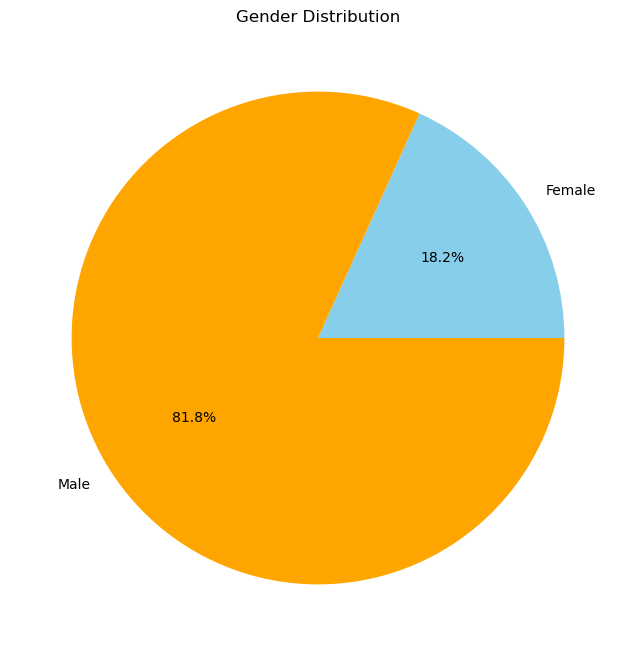

In [22]:
#Distribution of Reports By Sex

# Separate data by gender
female_count = event_vax_sympt_df[event_vax_sympt_df['SEX'] == 1].shape[0]
male_count = event_vax_sympt_df[event_vax_sympt_df['SEX'] == 0].shape[0]

# Plot pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie([female_count, male_count], labels=['Female', 'Male'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Gender Distribution')
plt.show()

Gender Disparity:

The chart shows that 81.8% of the individuals are male and 18.2% are female.

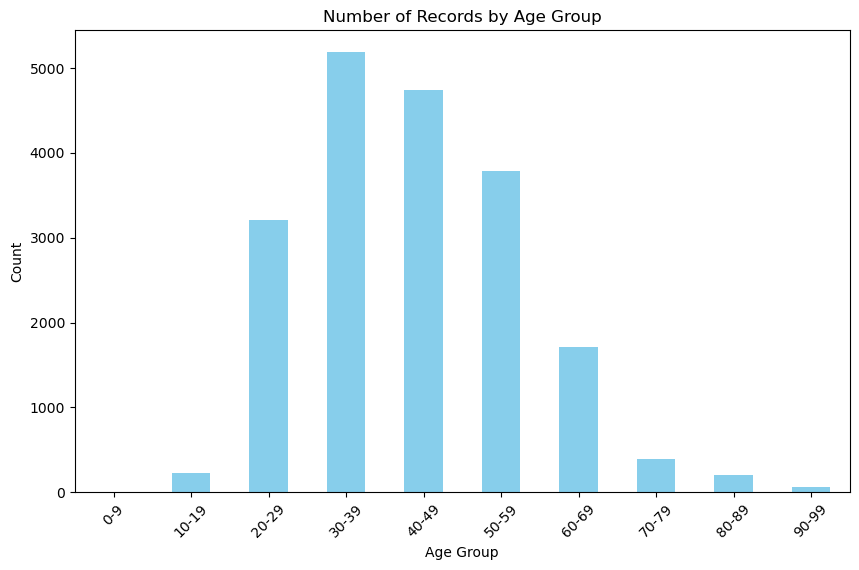

In [23]:
#Distribution of Reports By Age

# Plot bar chart by continuous age intervals
age_bins = range(0, 101, 10)  # Age bins with intervals of 10 years
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]
event_vax_sympt_df['age_group'] = pd.cut(event_vax_sympt_df['AGE_YRS'], bins=age_bins, labels=age_labels)

# Count age group frequencies
age_group_counts = event_vax_sympt_df['age_group'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of Records by Age Group')
plt.xticks(rotation=45)
plt.show()


The dataset is heavily skewed towards middle-aged individuals, with 30-59 being the dominant age range. 

In [24]:
# Statistical summary for age groups
age_groups = pd.cut(event_vax_sympt_df['AGE_YRS'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])
record_counts = event_vax_sympt_df.groupby(age_groups).size()
mean_age = round(event_vax_sympt_df['AGE_YRS'].mean(), 2)
std_age = round(event_vax_sympt_df['AGE_YRS'].std(), 2)
median_age = round(event_vax_sympt_df['AGE_YRS'].median(), 2)

# Print statistical summary
print(f"Average Age: {mean_age}")
print(f"Standard Deviation of Age: {std_age}")
print(f"Median Age: {median_age}")


Average Age: 44.09
Standard Deviation of Age: 13.85
Median Age: 43.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17720\2565043682.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  record_counts = event_vax_sympt_df.groupby(age_groups).size()


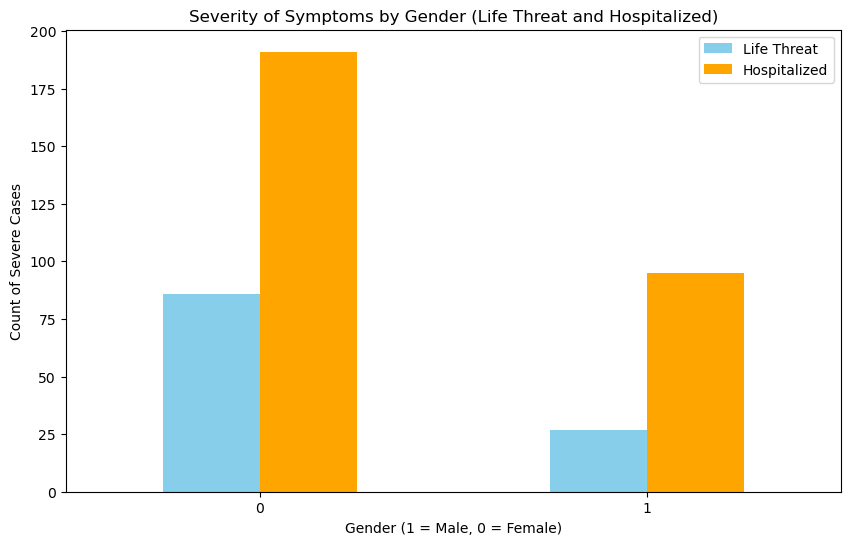

In [25]:
#Examine severity of symptoms by gender
import matplotlib.pyplot as plt

# Assuming you already have the event_data_df DataFrame

# Agrupar los datos por género y calcular la suma de las columnas L_THREAT y HOSPITAL
severity_by_gender = event_vax_sympt_df.groupby('SEX')[['L_THREAT', 'HOSPITAL']].sum()

# Graficar un gráfico de barras agrupado para la severidad por género
severity_by_gender.plot(kind='bar', color=['skyblue', 'orange'], figsize=(10, 6))
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count of Severe Cases')
plt.title('Severity of Symptoms by Gender (Life Threat and Hospitalized)')
plt.legend(['Life Threat', 'Hospitalized'])
plt.xticks(rotation=0)
plt.show()


Females appear to have a higher likelihood of severe outcomes (hospitalizations and life-threatening cases) following vaccination compared to males

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17720\2930234687.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DIED', y='AGE_YRS', data=event_vax_sympt_df, palette=['skyblue', 'orange'])


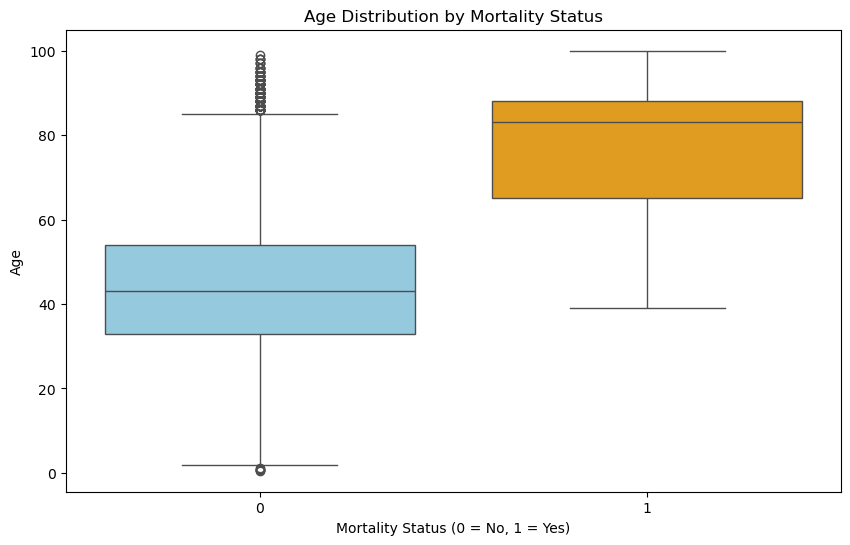

In [26]:
# Boxplot for age distribution by mortality status

plt.figure(figsize=(10, 6))
sns.boxplot(x='DIED', y='AGE_YRS', data=event_vax_sympt_df, palette=['skyblue', 'orange'])
plt.xlabel('Mortality Status (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age Distribution by Mortality Status')
plt.show()



Most individuals who died were between 70 to 90 years old, suggesting that older age is associated with a higher risk of mortality following vaccination.

The plot clearly suggests that older age is a major factor in increased mortality risk post-vaccination, as the median and the IQR for deceased individuals are both much higher compared to those who survived

The survivors' group shows numerous outliers at older ages, which might indicate that there are older individuals who survived despite the increased risk

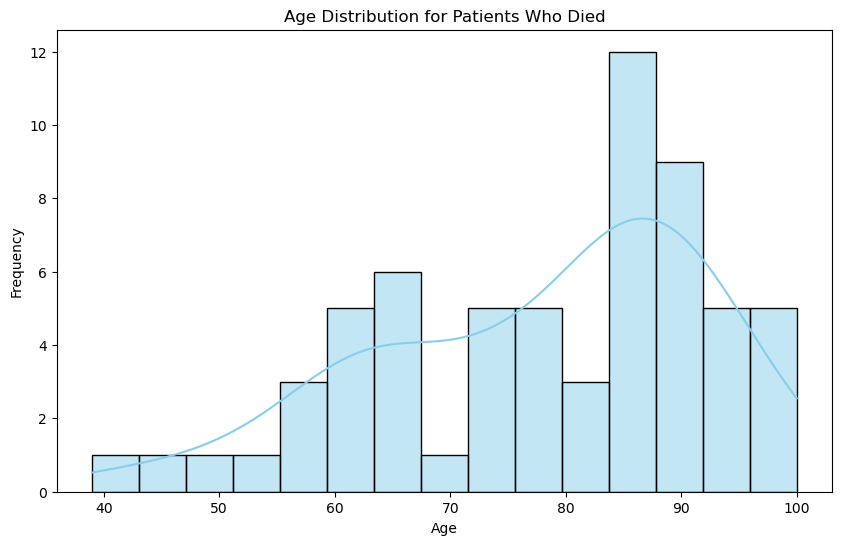

In [27]:
# Histogram for mortality rates by age groups
plt.figure(figsize=(10, 6))
sns.histplot(event_vax_sympt_df[event_vax_sympt_df['DIED'] == 1]['AGE_YRS'], bins=15, color='skyblue', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Patients Who Died')
plt.show()

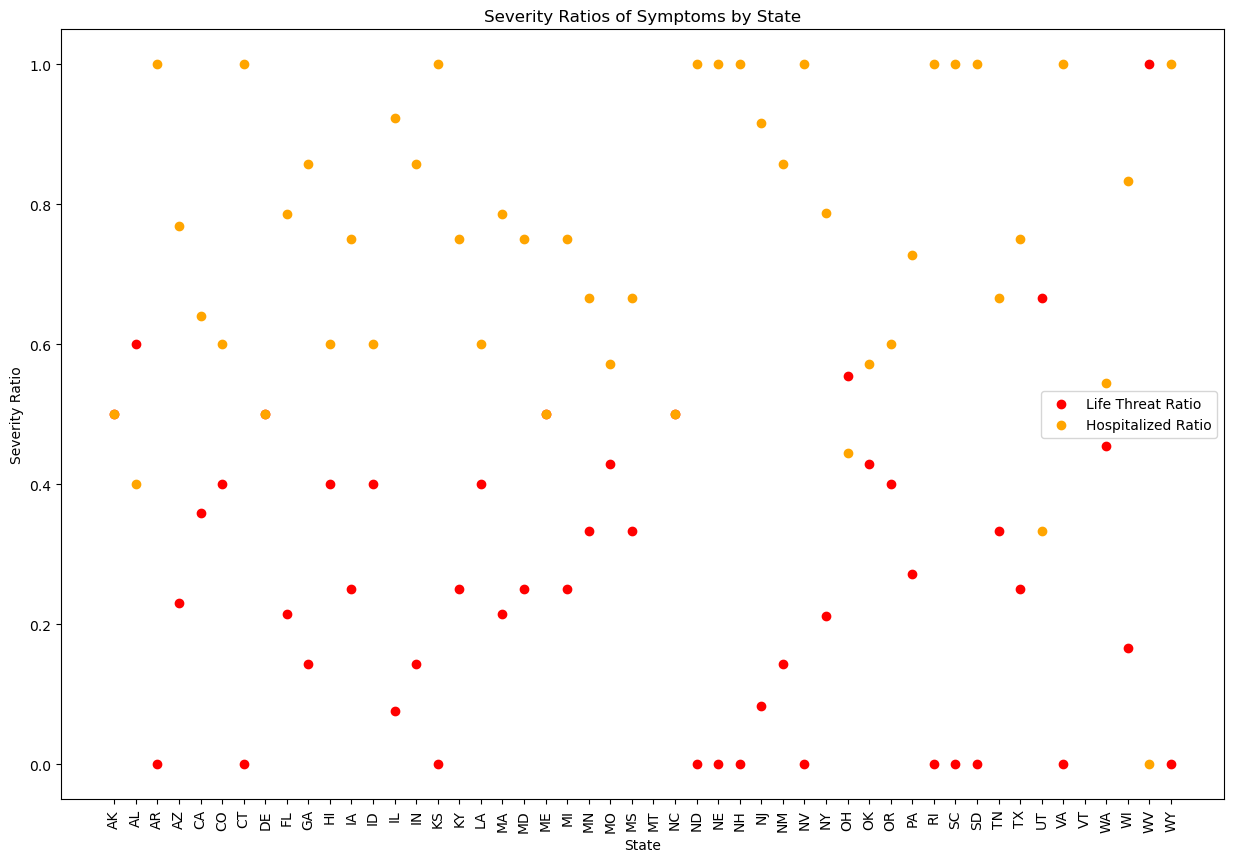

In [29]:
# Group severity data by state
severity_by_state = event_vax_sympt_df.groupby('STATE')[['L_THREAT', 'HOSPITAL']].sum().reset_index()

# Add total and calculate ratios
severity_by_state['TOTAL'] = severity_by_state['L_THREAT'] + severity_by_state['HOSPITAL']
severity_by_state['L_THREAT_RATIO'] = severity_by_state['L_THREAT'] / severity_by_state['TOTAL']
severity_by_state['HOSPITAL_RATIO'] = severity_by_state['HOSPITAL'] / severity_by_state['TOTAL']

# Plotting scatter plot for severity ratios by state
plt.figure(figsize=(15, 10))
plt.scatter(severity_by_state['STATE'], severity_by_state['L_THREAT_RATIO'], color='red', label='Life Threat Ratio')
plt.scatter(severity_by_state['STATE'], severity_by_state['HOSPITAL_RATIO'], color='orange', label='Hospitalized Ratio')
plt.xlabel('State')
plt.ylabel('Severity Ratio')
plt.title('Severity Ratios of Symptoms by State')
plt.xticks(rotation=90)
plt.legend()
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_17720\2354770140.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATE', y='FREQUENCY', data=reports_by_state, palette='viridis')


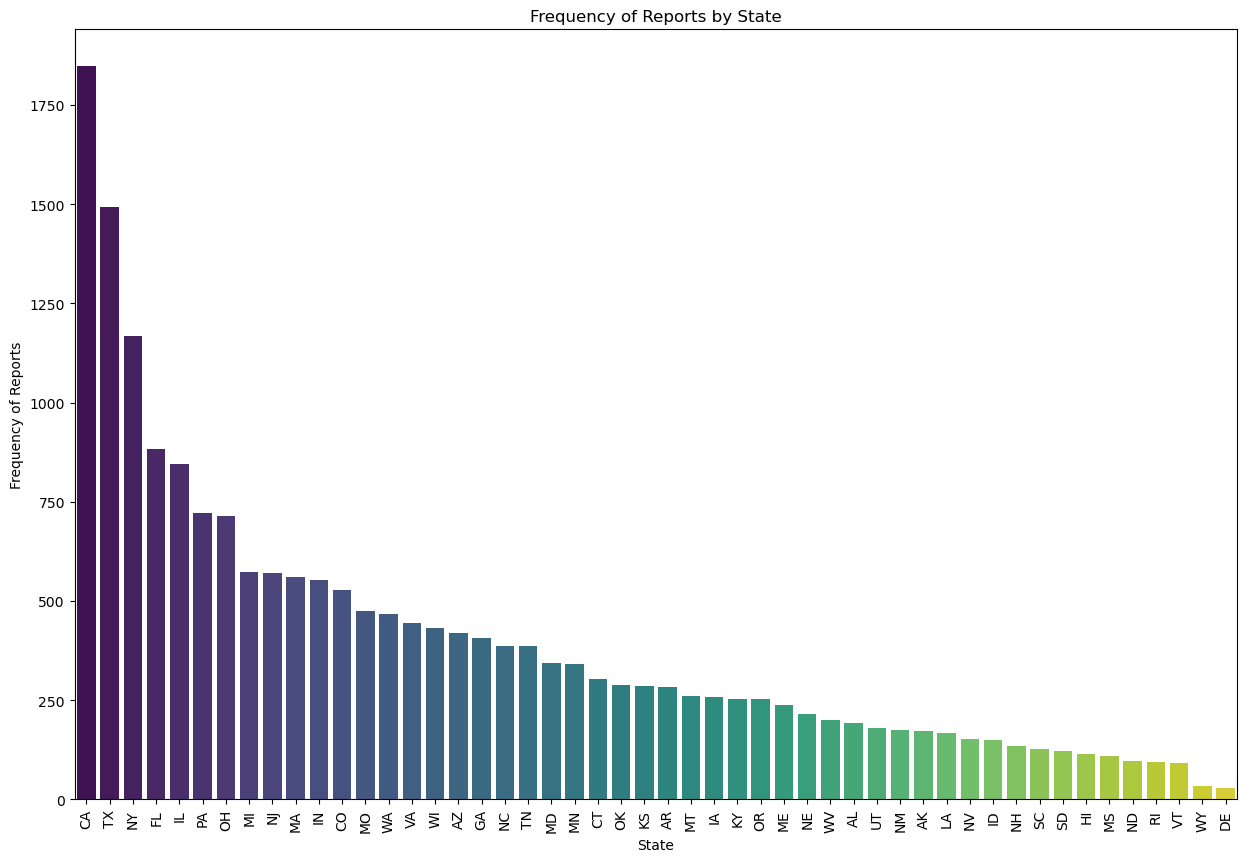

In [30]:
# Group reports data by state for frequency analysis
reports_by_state = event_vax_sympt_df['STATE'].value_counts().reset_index()
reports_by_state.columns = ['STATE', 'FREQUENCY']

# Plotting bar chart for frequency by state
plt.figure(figsize=(15, 10))
sns.barplot(x='STATE', y='FREQUENCY', data=reports_by_state, palette='viridis')
plt.xlabel('State')
plt.ylabel('Frequency of Reports')
plt.title('Frequency of Reports by State')
plt.xticks(rotation=90)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17720\2710406984.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATE', y='DIED', data=deaths_by_state, palette='Blues')


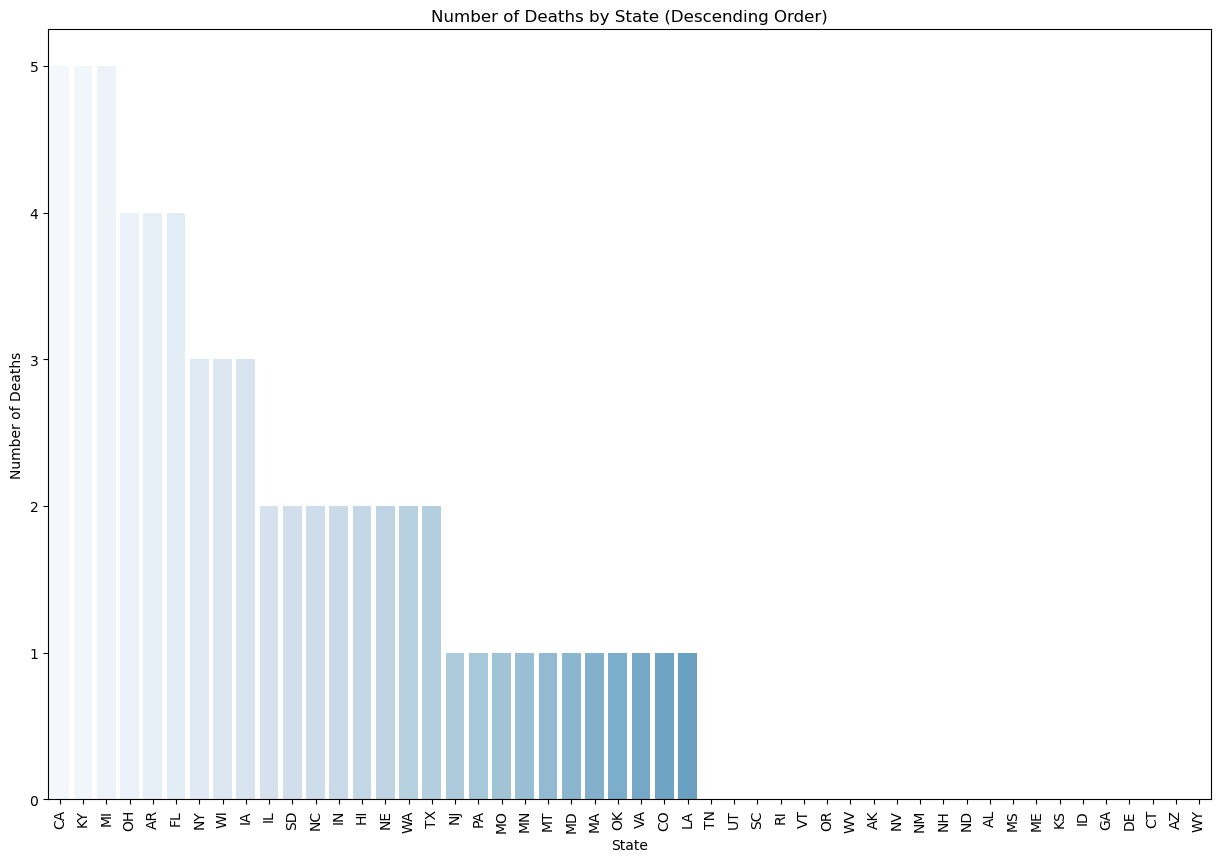

In [31]:
# Group deaths by state
deaths_by_state = event_vax_sympt_df.groupby('STATE')['DIED'].sum().reset_index()

# Sort data in descending order by number of deaths
deaths_by_state = deaths_by_state.sort_values(by='DIED', ascending=False)

# Plotting bar chart for deaths by state in descending order
plt.figure(figsize=(15, 10))
sns.barplot(x='STATE', y='DIED', data=deaths_by_state, palette='Blues')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by State (Descending Order)')
plt.xticks(rotation=90)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17720\3193590573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity_features['STATE'] = pd.factorize(event_vax_sympt_df['STATE'])[0]


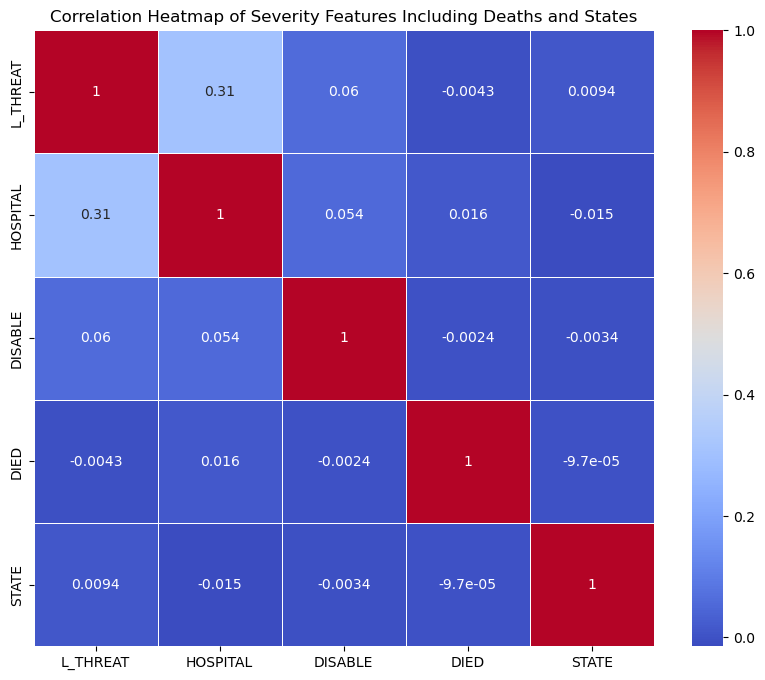

In [32]:

# Correlation heatmap for severity features including deaths and states
plt.figure(figsize=(10, 8))
severity_features = event_vax_sympt_df[['L_THREAT', 'HOSPITAL', 'DISABLE', 'DIED']]
severity_features['STATE'] = pd.factorize(event_vax_sympt_df['STATE'])[0]
sns.heatmap(severity_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Severity Features Including Deaths and States')
plt.show()

The only weak correlation is between life-threatening symptoms and hospitalization (0.31), which makes sense since severe cases often require hospitalization.
Other correlations are very weak or near zero, suggesting that the occurrences of DISABLE, DIED, and STATE have very little or no linear dependency with each other or with the severity features.

In [33]:
# Group report data by state
report_by_state = event_vax_sympt_df['STATE'].value_counts().reset_index()
report_by_state.columns = ['STATE', 'FREQUENCY']

# Calculate the report ratio by state
total_reports = report_by_state['FREQUENCY'].sum()
report_by_state['REPORT_RATIO'] = report_by_state['FREQUENCY'] / total_reports

# Plotting a choropleth map for report ratio by state using Plotly
fig = px.choropleth(
    report_by_state,
    locations='STATE',
    locationmode='USA-states',  # Set the location mode to US states
    color='REPORT_RATIO',
    color_continuous_scale='Blues',
    scope='usa',
    title='Choropleth Map of Report Ratio by State'
)

fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
    )
)

fig.show()


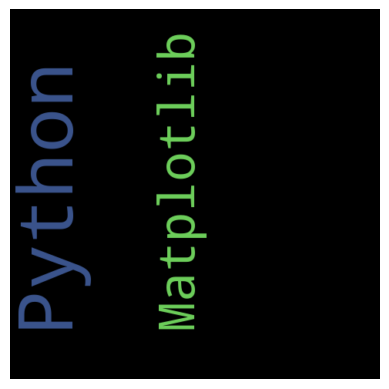

In [34]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [35]:
# Group deaths by state
deaths_by_state = event_vax_sympt_df.groupby('STATE')['DIED'].sum().reset_index()

# Calculate death ratio by dividing deaths by total reports per state
reports_by_state = event_vax_sympt_df['STATE'].value_counts().reset_index()
reports_by_state.columns = ['STATE', 'TOTAL_REPORTS']
deaths_by_state = deaths_by_state.merge(reports_by_state, on='STATE')
deaths_by_state['DEATH_RATIO'] = deaths_by_state['DIED'] / deaths_by_state['TOTAL_REPORTS']

# Sort deaths by state by death ratio in descending order
deaths_by_state = deaths_by_state.sort_values(by='DEATH_RATIO', ascending=False)

# Plotting a choropleth map for deaths by state using Plotly
fig = px.choropleth(
    deaths_by_state,
    locations='STATE',
    locationmode='USA-states',  # Set the location mode to US states
    color='DEATH_RATIO',
    color_continuous_scale='Reds',
    scope='usa',
    title='Choropleth Map of Death Ratio by State'
)

fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
    )
)

fig.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17720\4077032517.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




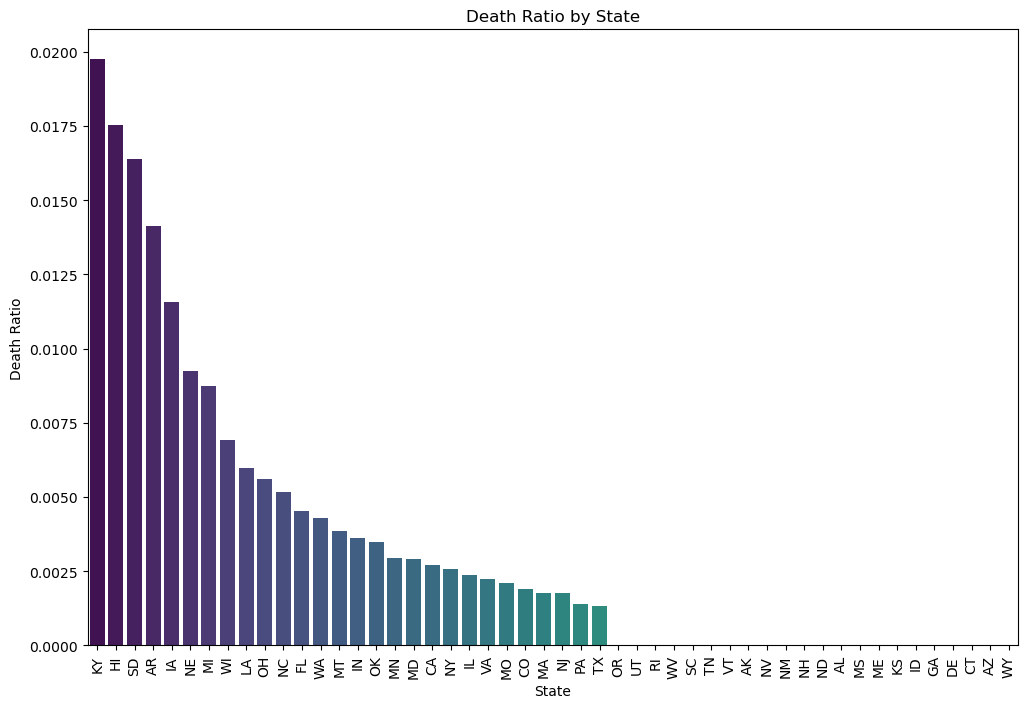

In [36]:
# Group deaths and total reports by state
deaths_by_state = event_vax_sympt_df.groupby('STATE')['DIED'].sum().reset_index()
reports_by_state = event_vax_sympt_df['STATE'].value_counts().reset_index()
reports_by_state.columns = ['STATE', 'TOTAL_REPORTS']

# Merge to calculate death ratio by state
deaths_by_state = deaths_by_state.merge(reports_by_state, on='STATE')
deaths_by_state['DEATH_RATIO'] = deaths_by_state['DIED'] / deaths_by_state['TOTAL_REPORTS']

# Plotting bar chart sorted by death ratio
deaths_by_state = deaths_by_state.sort_values(by='DEATH_RATIO', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE', y='DEATH_RATIO', data=deaths_by_state, palette='viridis')
plt.xlabel('State')
plt.ylabel('Death Ratio')
plt.title('Death Ratio by State')
plt.xticks(rotation=90)
plt.show()
